In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import itertools
import sklearn
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report 
from sklearn import datasets 
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, MaxPool2D,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
        'SKINDISEASE DATASET',
        target_size=(32, 32),
        batch_size=8,
)

test_data = test_datagen.flow_from_directory(
        'SKINDISEASE DATASET',
        target_size=(32, 32),
        batch_size=8,
        )

Found 1400 images belonging to 4 classes.
Found 1400 images belonging to 4 classes.


In [3]:
tf.keras.preprocessing.image.DirectoryIterator(
    "SKINDISEASE DATASET",
    ImageDataGenerator,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=None,
    data_format=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False,
    dtype=None
)

Found 1400 images belonging to 4 classes.


In [4]:
#Set all the Constants
batchSize = 32
imageSize = 256
channels=3
epoch = 50

In [5]:
#Import data into tensorflow dataset object()
imageDataset = tf.keras.preprocessing.image_dataset_from_directory(
    "SKINDISEASE DATASET", seed=123, shuffle=True, image_size=(imageSize,imageSize), batch_size=batchSize
)

Found 1400 files belonging to 4 classes.


In [6]:
#Check for dataset classes
classNames = imageDataset.class_names
classNames

['Acne and Rosacea',
 'Eczema',
 'Melanoma Skin Cancer Nevi and Moles',
 'Psoriasis']

In [7]:
pre_trained_model = VGG19(input_shape=(256, 256, 3), include_top=False, weights="imagenet")

In [8]:
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(pre_trained_model.layers))

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool
22


In [9]:
last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 8, 8, 512)


In [10]:
# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1)(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
        train_data,
        validation_data=train_data,
        verbose=1,
        epochs=epoch,
       )

Epoch 1/50
175/175 [==============================] - 491s 3s/step - loss: 3.8240 - accuracy: 0.7429 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 2/50
175/175 [==============================] - 570s 3s/step - loss: 3.8562 - accuracy: 0.7500 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 3/50
175/175 [==============================] - 521s 3s/step - loss: 3.8562 - accuracy: 0.7500 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 4/50
175/175 [==============================] - 510s 3s/step - loss: 3.8562 - accuracy: 0.7500 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 5/50
175/175 [==============================] - 544s 3s/step - loss: 3.8562 - accuracy: 0.7500 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 6/50
175/175 [==============================] - 516s 3s/step - loss: 3.8422 - accuracy: 0.7479 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 7/50
175/175 [==============================] - 525s 3s/step - loss: 3.8562 - accuracy: 0.7500 - val_loss: 3.8562 - val_accuracy: 0.7500

In [12]:
for layer in pre_trained_model.layers:
    layer.trainable = True

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [16]:
loss_val, acc_val = model.evaluate(train_data, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

175/175 [==============================] - 30s 159ms/step - loss: 3.8562 - accuracy: 0.7500
Validation: accuracy = 0.750000  ;  loss_v = 3.856240


In [17]:
loss_test, acc_test = model.evaluate(test_data, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

175/175 [==============================] - 27s 154ms/step - loss: 3.8562 - accuracy: 0.7500
Test: accuracy = 0.750000  ;  loss = 3.856240


In [26]:
accuracy = history.history['accuracy']
validationAccuracy = history.history['val_accuracy']

loss = history.history['loss']
validationLoss = history.history['val_loss']

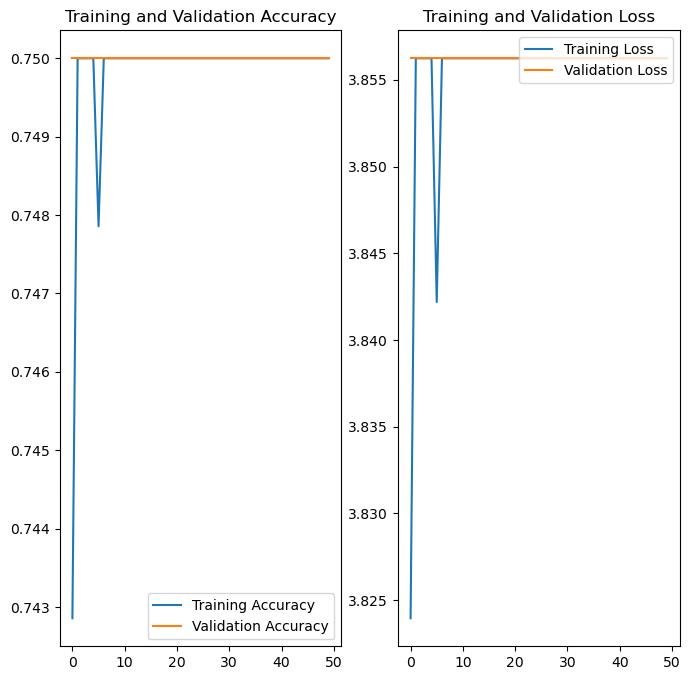

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), accuracy, label='Training Accuracy')
plt.plot(range(epoch), validationAccuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), validationLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
model_version=max([int(i) for i in os.listdir("../skinDiseaseDetection/models") + [1]])
model.save(f"../skinDiseaseDetection/models/{model_version}")

INFO:tensorflow:Assets written to: ../skinDiseaseDetection/models/6\assets


INFO:tensorflow:Assets written to: ../skinDiseaseDetection/models/6\assets


In [29]:
model.save("../modelVGG.h5")